In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/256datat/Input.mat


In [67]:
from scipy.io import loadmat
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
from bayes_opt import BayesianOptimization
from PIL import Image,ImageOps
import progressbar
from progressbar import *

In [68]:
x=loadmat('/kaggle/input/256datat/Input.mat')


x_train=x['Input']
print(x_train)
x_train.shape



[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


(256, 256, 197)

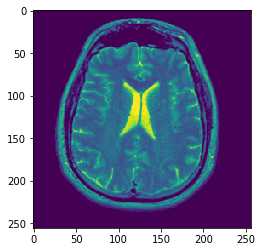

In [69]:
I= x_train[:,:,5]

I.shape

plt.imshow(I[:,:])

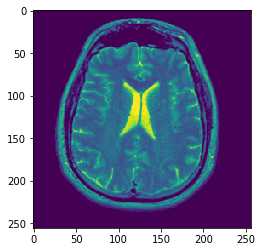

In [70]:
m=np.zeros(shape=(1,256,256,3))
for i in range (1):
    temp=I[:,:]
    m[i,:,:,0]=temp
    m[i,:,:,1]=temp
    m[i,:,:,2]=temp

m[0].shape

plt.imshow(m[0,:,:,1])

In [71]:
def haarMatrix(n, normalized=False):
    # Allow only size n of power 2
    n = 2**np.ceil(np.log2(n))
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    if normalized:
        h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])
    else:
        h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return h

In [72]:
A=haarMatrix(256)
print(A)
print(A.shape)

[[ 1.  1.  1. ...  1.  1.  1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -0. -0. -0.]
 ...
 [ 0. -0.  0. ... -0.  0. -0.]
 [ 0. -0.  0. ... -1.  0. -0.]
 [ 0. -0.  0. ... -0.  1. -1.]]
(256, 256)


In [73]:
B= A.transpose()
            
            
            
print(B.shape)
print(B)

(256, 256)
[[ 1.  1.  1. ...  0.  0.  0.]
 [ 1.  1.  1. ... -0. -0. -0.]
 [ 1.  1.  1. ...  0.  0.  0.]
 ...
 [ 1. -1. -0. ... -0. -1. -0.]
 [ 1. -1. -0. ...  0.  0.  1.]
 [ 1. -1. -0. ... -0. -0. -1.]]


In [74]:
F=B.dot(I)
print(F)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [75]:
F.shape

(256, 256)

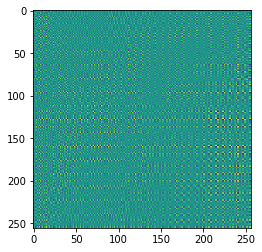

In [76]:
G=F.dot(A)
plt.imshow(G[:,:])

In [77]:
 
from numpy.linalg import inv

b = np.linalg.inv(B)

In [78]:
print(b)
print(b.shape)

[[ 0.00390625  0.00390625  0.00390625 ...  0.00390625  0.00390625
   0.00390625]
 [ 0.00390625  0.00390625  0.00390625 ... -0.00390625 -0.00390625
  -0.00390625]
 [ 0.0078125   0.0078125   0.0078125  ... -0.         -0.
  -0.        ]
 ...
 [-0.         -0.         -0.         ... -0.         -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.5        -0.
  -0.        ]
 [-0.         -0.         -0.         ... -0.          0.5
  -0.5       ]]
(256, 256)


In [79]:

a=np.linalg.inv(A)
print(a)
print(a.shape)

[[ 0.00390625  0.00390625  0.0078125  ...  0.          0.
   0.        ]
 [ 0.00390625  0.00390625  0.0078125  ... -0.         -0.
  -0.        ]
 [ 0.00390625  0.00390625  0.0078125  ... -0.         -0.
  -0.        ]
 ...
 [ 0.00390625 -0.00390625 -0.         ... -0.         -0.5
  -0.        ]
 [ 0.00390625 -0.00390625 -0.         ... -0.         -0.
   0.5       ]
 [ 0.00390625 -0.00390625 -0.         ... -0.         -0.
  -0.5       ]]
(256, 256)


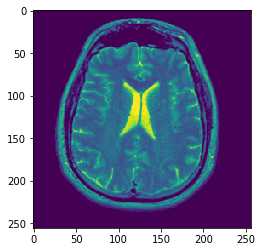

In [80]:
P=b.dot(G)
Q=P.dot(a)

plt.imshow(Q[:,:])